In [97]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [98]:
path = '/home/mehul/Documents/training/python/data/employee_data.csv'

In [99]:
df = pd.read_csv(path)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [100]:
s1 = df['Purchased'].value_counts()
print(s1)
print('Percentage of 0 is {0}'.format(s1.loc[0] / (s1.sum())))
print('Percentage of 1 is {0}'.format(s1.loc[1] / (s1.sum())))

0    257
1    143
Name: Purchased, dtype: int64
Percentage of 0 is 0.6425
Percentage of 1 is 0.3575


In [101]:
x = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [102]:
# the above label has imbalanced classes
# we use smote to do the oversampling of the minority class
from imblearn.over_sampling import SMOTE

In [103]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [104]:
from collections import Counter
counter = Counter(y_resampled)
counter

Counter({0: 257, 1: 257})

In [105]:
print(x_resampled)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 ...
 [    44 142316]
 [    50 100337]
 [    56 122000]]


In [106]:
df['Purchased'].unique()
# makes it a candidate for classification using Binomial logistic regression

array([0, 1])

In [107]:
x = df[['Age', 'EstimatedSalary']]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [108]:
y = df['Purchased'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [109]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled)
x_train

array([[    34,  25000],
       [    31,  34000],
       [    35,  44000],
       [    41,  51000],
       [    33,  60000],
       [    48,  35000],
       [    32, 120000],
       [    35,  50000],
       [    60,  42000],
       [    30,  49000],
       [    47, 105000],
       [    49,  36000],
       [    42,  80000],
       [    35,  23000],
       [    42,  75000],
       [    22,  18000],
       [    40, 142000],
       [    29,  43000],
       [    59,  88000],
       [    34, 112000],
       [    39,  79000],
       [    58,  95000],
       [    47,  25000],
       [    45,  46460],
       [    51, 104000],
       [    26,  80000],
       [    38, 113000],
       [    40,  57000],
       [    24,  55000],
       [    40, 121452],
       [    32,  18000],
       [    23,  48000],
       [    48,  74000],
       [    35,  27000],
       [    46,  79000],
       [    29,  28000],
       [    28,  55000],
       [    26, 118000],
       [    31,  66000],
       [    36,  63000],


In [111]:
c1 = Counter(y_train)
print(c1)
print('Percentage of 0 is {0}'.format(c1[0] / (c1[0] + c1[1])))
print('Percentage of 1 is {0}'.format(c1[1] / (c1[0] + c1[1])))

Counter({1: 206, 0: 205})
Percentage of 0 is 0.49878345498783455
Percentage of 1 is 0.5012165450121655


In [112]:
c2 = Counter(y_test)
print(c2)
print('Percentage of 0 is {0}'.format(c2[0] / (c2[0] + c2[1])))
print('Percentage of 1 is {0}'.format(c2[1] / (c2[0] + c2[1])))

Counter({0: 52, 1: 51})
Percentage of 0 is 0.5048543689320388
Percentage of 1 is 0.49514563106796117


In [113]:
# the age and estimated salary features are out of scale
# Standard normalized data
scaler = StandardScaler()
std_normal_x_train = scaler.fit_transform(x_train)
std_normal_x_test = scaler.fit_transform(x_test)

In [114]:
print(std_normal_x_train.mean())
print(std_normal_x_train.std())

4.322036105596717e-17
1.0


In [115]:
print(std_normal_x_test.mean())
print(std_normal_x_test.std())

-1.3258003109601383e-16
1.0


In [116]:
lr1 = LogisticRegression()
lr1.fit(std_normal_x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
d3 = df[['Age', 'EstimatedSalary']]
d3

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [118]:
d3.corr()

,Age,EstimatedSalary
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000


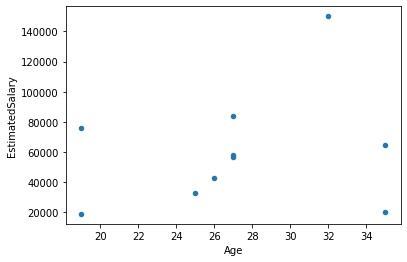

In [119]:
d4 = d3.head(10)
d4.plot.scatter(x='Age', y='EstimatedSalary')
plt.show()

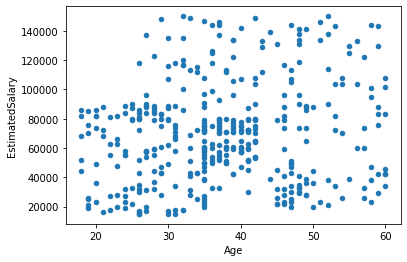

In [120]:
d3.plot.scatter(x='Age', y='EstimatedSalary')
plt.show()

In [121]:
dd = scaler.transform([[52, 150000]])
print(dd)
lr1.predict(dd)

[[1.1945588  2.10784863]]


array([1])

In [122]:
dd = scaler.transform([[48, 29000]])
print(dd)
lr1.predict(dd)

[[ 0.8197239  -1.26012422]]


array([1])

In [123]:
d5 = DataFrame(d3)
d5.index = d5['Age']
del d5['Age']
d5

,EstimatedSalary
Age,
19,19000
35,20000
26,43000
27,57000
19,76000
...,...
46,41000
51,23000
50,20000


In [124]:
print(x_test)

[[    48  29000]
 [    43 133000]
 [    40  57000]
 [    28  32000]
 [    58  38000]
 [    35  57000]
 [    57  60000]
 [    29  75000]
 [    23  63000]
 [    32 135000]
 [    31  68000]
 [    27 137000]
 [    24  58000]
 [    32  96671]
 [    60  42438]
 [    38  80000]
 [    35  79000]
 [    36  54000]
 [    37  80000]
 [    54 104000]
 [    33  41000]
 [    53  34000]
 [    40  79612]
 [    59 130000]
 [    48  33000]
 [    33 149000]
 [    35  22000]
 [    18  52000]
 [    51 146000]
 [    35  73000]
 [    42 108000]
 [    26  86000]
 [    27  20000]
 [    47  30000]
 [    44  80443]
 [    39 134000]
 [    39  73000]
 [    58 101000]
 [    60  42000]
 [    19  26000]
 [    41  60000]
 [    46  74000]
 [    33  31000]
 [    49  88000]
 [    48  34819]
 [    19  21000]
 [    31 118000]
 [    48 131000]
 [    42  54000]
 [    44 129092]
 [    21  68000]
 [    46  22000]
 [    37  52000]
 [    40  75000]
 [    26  72000]
 [    51  23000]
 [    50  85500]
 [    21  88000]
 [    27  5700

In [125]:
y_pred = lr1.predict(std_normal_x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [126]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [127]:
len(y_test)

103

In [128]:
# how many right 1's and right 0's
confusion_matrix(y_test, y_pred)

array([[45,  7],
       [ 5, 46]])

In [129]:
accuracy_score(y_test, y_pred)

0.883495145631068